In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# YOLO 학습

YOLO에 대한 커스텀 데이터 학습

https://github.com/qqwweee/keras-yolo3


In [2]:
%%shell
pip uninstall -y keras
pip install keras==2.2.4

Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 317kB 17.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


## 프로젝트 다운로드


In [3]:
%cd /content

!rm -rf keras-yolo3

!git clone https://github.com/qqwweee/keras-yolo3


/content
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 18.88 MiB/s, done.
Resolving deltas: 100% (65/65), done.


## YOLO3 모델 다운로드


In [4]:
%cd /content/keras-yolo3
!wget https://pjreddie.com/media/files/yolov3.weights

/content/keras-yolo3
--2020-12-01 06:30:12--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   497KB/s    in 5m 48s  

2020-12-01 06:36:01 (696 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



## 모델 파일 변환

DarkNet의 모델파일을 Keras에서 사용할 수 있는 모델 파일로 변환한다.


- convert.py : 변환 실행 파일
- yolov3.cfg : Darknet에서 사용하는 모델 구조 정의 파일
- yolov3.weight : Darknet으로 학습된 모델 파일

실행 결과로 다음의 h5 파일로 변환된다. 
- yolov3.h5 : 변환된 모델 파일


In [5]:
!head -40 yolov3.cfg 

[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1


In [6]:
# 실행하기전 기존것이 있다면 삭제
!rm -rf yolov3.h5

# 실행 
%run convert.py yolov3.cfg yolov3.weights yolov3.h5

Using TensorFlow backend.


Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)









Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section short

In [7]:
!ls -al 

total 485184
drwxr-xr-x 6 root root      4096 Dec  1 06:37 .
drwxr-xr-x 1 root root      4096 Dec  1 06:30 ..
-rw-r--r-- 1 root root      1323 Dec  1 06:30 coco_annotation.py
-rw-r--r-- 1 root root     10093 Dec  1 06:30 convert.py
-rw-r--r-- 1 root root      5707 Dec  1 06:30 darknet53.cfg
drwxr-xr-x 2 root root      4096 Dec  1 06:30 font
drwxr-xr-x 8 root root      4096 Dec  1 06:30 .git
-rw-r--r-- 1 root root      1201 Dec  1 06:30 .gitignore
-rw-r--r-- 1 root root      3482 Dec  1 06:30 kmeans.py
-rw-r--r-- 1 root root      1064 Dec  1 06:30 LICENSE
drwxr-xr-x 2 root root      4096 Dec  1 06:30 model_data
-rw-r--r-- 1 root root      4077 Dec  1 06:30 README.md
-rw-r--r-- 1 root root     10686 Dec  1 06:30 train_bottleneck.py
-rw-r--r-- 1 root root      8332 Dec  1 06:30 train.py
-rw-r--r-- 1 root root      1416 Dec  1 06:30 voc_annotation.py
drwxr-xr-x 2 root root      4096 Dec  1 06:30 yolo3
-rw-r--r-- 1 root root      8540 Dec  1 06:30 yolo.py
-rw-r--r-- 1 root root      8342 De

# 커스텀 데이터 학습


## 데이터 파일 다운로드

In [8]:
%cd /content/keras-yolo3
!wget https://github.com/dhrim/hongik_2021/raw/master/material/deep_learning/dogs_cats_yolo_labeled.zip

/content/keras-yolo3
--2020-12-01 06:37:54--  https://github.com/dhrim/hongik_2021/raw/master/material/deep_learning/dogs_cats_yolo_labeled.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dhrim/hongik_2021/master/material/deep_learning/dogs_cats_yolo_labeled.zip [following]
--2020-12-01 06:37:54--  https://raw.githubusercontent.com/dhrim/hongik_2021/master/material/deep_learning/dogs_cats_yolo_labeled.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5478153 (5.2M) [application/zip]
Saving to: ‘dogs_cats_yolo_labeled.zip’

dogs_cats_yolo_labe 100%[===================>]   5.22M  --.-KB/s    in 0

In [9]:
!unzip dogs_cats_yolo_labeled.zip

Archive:  dogs_cats_yolo_labeled.zip
   creating: dogs_cats_yolo_labeled/
  inflating: dogs_cats_yolo_labeled/cat.99.jpg  
  inflating: dogs_cats_yolo_labeled/cat.99.xml  
  inflating: dogs_cats_yolo_labeled/cat.990.jpg  
  inflating: dogs_cats_yolo_labeled/cat.990.xml  
  inflating: dogs_cats_yolo_labeled/cat.9900.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9900.xml  
  inflating: dogs_cats_yolo_labeled/cat.9901.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9901.xml  
  inflating: dogs_cats_yolo_labeled/cat.9902.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9902.xml  
  inflating: dogs_cats_yolo_labeled/cat.9903.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9903.xml  
  inflating: dogs_cats_yolo_labeled/cat.9904.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9904.xml  
  inflating: dogs_cats_yolo_labeled/cat.9905.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9905.xml  
  inflating: dogs_cats_yolo_labeled/cat.9906.jpg  
  inflating: dogs_cats_yolo_labeled/cat.9906.xml  
  inflating: d

## 레이블링 데이터 포멧 변환

dogs_cats_yolo_labeled 폴더 안의 xml 파일들을 읽어서 labels.txt 파일을 생성한다.

In [10]:
!cat dogs_cats_yolo_labeled/cat.99.xml

<annotation>
	<folder>dogs-cats</folder>
	<filename>cat.99.jpg</filename>
	<path>C:\Users\LENOVO\Desktop\dogs-cats\dogs-cats\cat.99.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<size>
		<width>225</width>
		<height>175</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>cat</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>11</xmin>
			<ymin>13</ymin>
			<xmax>202</xmax>
			<ymax>166</ymax>
		</bndbox>
	</object>
</annotation>


In [11]:
%cd /content/keras-yolo3

import os
import glob

CLASS_NAMES = [ "cat", "dog" ] 
# TAGET_FOLDER_NAME = "labels"
TAGET_FOLDER_NAME = "dogs_cats_yolo_labeled"


label_file_names = []
for file_name in glob.glob(TAGET_FOLDER_NAME+'/*.xml'):
  label_file_names.append(file_name)

print(label_file_names)

import xml.etree.ElementTree as ET

all_record = []

for file_name in label_file_names:

  with open(file_name) as in_file:

    tree = ET.parse(in_file)
    root = tree.getroot()

    a_record = [ file_name.replace("xml", "jpg") ]

    for obj in root.iter('object'):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in CLASS_NAMES or int(difficult)==1:
            continue
        cls_id = str(CLASS_NAMES.index(cls))
        xmlbox = obj.find('bndbox')
        xmin = xmlbox.find('xmin').text
        ymin = xmlbox.find('ymin').text
        xmax = xmlbox.find('xmax').text
        ymax = xmlbox.find('ymax').text

        a_record.append(",".join([xmin,ymin,xmax,ymax,cls_id]))

    all_record.append(a_record)


with open("labels.txt", "w") as f:
  for a_record in all_record:
    print(a_record)
    f.write(" ".join([str(i) for i in a_record]))
    f.write("\n")

print("labels.txt created.")

/content/keras-yolo3
['dogs_cats_yolo_labeled/dog.9915.xml', 'dogs_cats_yolo_labeled/dog.9907.xml', 'dogs_cats_yolo_labeled/dog.995.xml', 'dogs_cats_yolo_labeled/cat.9910.xml', 'dogs_cats_yolo_labeled/cat.9963.xml', 'dogs_cats_yolo_labeled/dog.9901.xml', 'dogs_cats_yolo_labeled/dog.99.xml', 'dogs_cats_yolo_labeled/cat.9961.xml', 'dogs_cats_yolo_labeled/dog.994.xml', 'dogs_cats_yolo_labeled/dog.9988.xml', 'dogs_cats_yolo_labeled/dog.9930.xml', 'dogs_cats_yolo_labeled/dog.9961.xml', 'dogs_cats_yolo_labeled/cat.9987.xml', 'dogs_cats_yolo_labeled/cat.9935.xml', 'dogs_cats_yolo_labeled/cat.9982.xml', 'dogs_cats_yolo_labeled/dog.9931.xml', 'dogs_cats_yolo_labeled/cat.9985.xml', 'dogs_cats_yolo_labeled/dog.9917.xml', 'dogs_cats_yolo_labeled/dog.9950.xml', 'dogs_cats_yolo_labeled/cat.9927.xml', 'dogs_cats_yolo_labeled/cat.9951.xml', 'dogs_cats_yolo_labeled/cat.9978.xml', 'dogs_cats_yolo_labeled/dog.9922.xml', 'dogs_cats_yolo_labeled/dog.9933.xml', 'dogs_cats_yolo_labeled/cat.9914.xml', 'dogs_c

In [12]:
!head labels.txt

dogs_cats_yolo_labeled/dog.9915.jpg 8,15,472,475,1
dogs_cats_yolo_labeled/dog.9907.jpg 6,40,422,286,1
dogs_cats_yolo_labeled/dog.995.jpg 179,30,447,356,1
dogs_cats_yolo_labeled/cat.9910.jpg 105,3,481,295,0
dogs_cats_yolo_labeled/cat.9963.jpg 10,37,357,248,0
dogs_cats_yolo_labeled/dog.9901.jpg 13,10,463,440,1
dogs_cats_yolo_labeled/dog.99.jpg 61,12,470,358,1
dogs_cats_yolo_labeled/cat.9961.jpg 25,9,291,249,0
dogs_cats_yolo_labeled/dog.994.jpg 130,19,407,308,1
dogs_cats_yolo_labeled/dog.9988.jpg 160,24,271,275,1 292,80,495,270,1 278,1,410,56,1


In [13]:
%%shell
cd /content/keras-yolo3
ls -al dogs_cats_yolo_labeled/cat.99.jpg
ls -al dogs_cats_yolo_labeled/class_names.txt
ls -al labels.txt
ls -al yolov3.h5

-rw-r--r-- 1 root root 6638 Aug 24 01:43 dogs_cats_yolo_labeled/cat.99.jpg
-rw-r--r-- 1 root root 8 Aug 24 23:59 dogs_cats_yolo_labeled/class_names.txt
-rw-r--r-- 1 root root 11736 Dec  1 06:38 labels.txt
-rw-r--r-- 1 root root 248686680 Dec  1 06:37 yolov3.h5


## 학습 실행

학습에 필요한 파일은 4개이다.

- 이미지 파일들 : dogs_cats_yolo_labeled/*.jpg
- 클래스 이름 파일 : dogs_cats_yolo_labeled/class_names.txt
- 레이블링 파일 : labels.txt
- 기반 모델 파일 : yolov3.h5



## train.py 사용 말고

다음은 train.py의 코드를 그대로 가져온 것이다.

이 경우 epcoh, annotion_path, clas_path, weight_path등의 변경해서 사용할 수 있다.

In [14]:
INIT_EPOCH = 50   # conv 레이어들을 고정하고 학습
MAIN_EPOCH = 50   # 이후 conv 레이어들까지 학습
BATCH_SIZE = 16
ANNOTATOIN_PATH = 'labels.txt'
CLASS_PATH = 'dogs_cats_yolo_labeled/class_names.txt'
WEIGHT_PATH = 'yolov3.h5'
ANCHORS_PATH = 'model_data/yolo_anchors.txt'
NEW_WEIGHT_PATH = "new_trained_yolov3.h5"

In [15]:
"""
Retrain the YOLO model for your own dataset.
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = ANNOTATOIN_PATH
    log_dir = 'logs/000/'
    classes_path = CLASS_PATH
    anchors_path = ANCHORS_PATH
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path=WEIGHT_PATH)
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path=WEIGHT_PATH) # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.1
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = BATCH_SIZE
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=INIT_EPOCH,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        # model.save_weights(log_dir + 'trained_weights_stage_1.h5')
        model.save_weights(NEW_WEIGHT_PATH)

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = BATCH_SIZE # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=MAIN_EPOCH,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        # model.save_weights(log_dir + 'trained_weights_final.h5')
        model.save_weights(NEW_WEIGHT_PATH)

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo_weights.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)


_main()



Create YOLOv3 model with 9 anchors and 2 classes.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 21) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((21,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 21) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((21,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape ((1,

Load weights yolov3.h5.
Freeze the first 249 layers of total 252 layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 200 samples, val on 22 samples, with batch size 16.




Epoch 1/50
12/12 [==============================] - 24s 2s/step - loss: 5690.0413 - val_loss: 2599.0261

Epoch 2/50
12/12 [==============================] - 11s 937ms/step - loss: 1505.6071 - val_loss: 839.8021
Epoch 3/50
12/12 [==============================] - 13s 1s/step - loss: 575.3313 - val_loss: 433.2198
Epoch 4/50
12/12 [==============================] - 5s 416ms/step - loss: 338.0025 - val_loss: 276.0147
Epoch 5/50
12/12 [==============================] - 11s 919ms/step - loss: 239.3199 - val_loss: 198.9050
Epoch 6/50
12/12 [==============================] - 13s 1s/step - loss: 195.5764 - val_loss: 155.1190
Epoch 7/50
12/12 [==============================] - 13s 1s/step - loss: 165.4394 - val_loss: 122.9140
Epoch 8/50
12/12 [======================

new_trained_yolov3.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 1 boxes for img
cat 0.62 (0, 0) (225, 175)
2.438849687000129


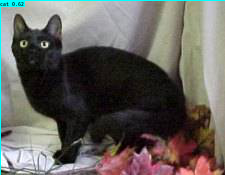

(416, 416, 3)
Found 1 boxes for img
dog 0.61 (0, 31) (500, 347)
0.05049220199998672


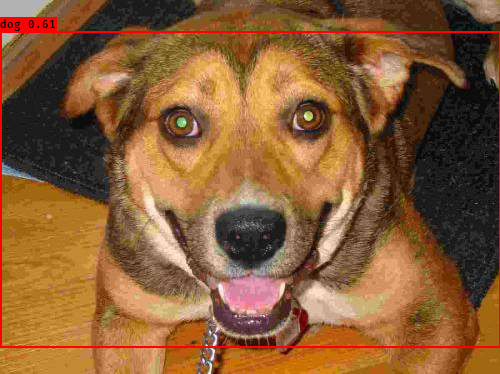

(416, 416, 3)
Found 1 boxes for img
cat 0.48 (3, 53) (403, 342)
0.051218122000136646


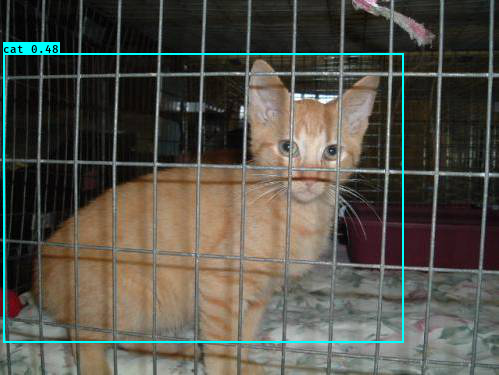

(416, 416, 3)
Found 0 boxes for img
0.04888308899990079


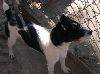

In [16]:
from IPython.display import display 
from PIL import Image
from yolo import YOLO

yolo = YOLO(model_path=NEW_WEIGHT_PATH, anchors_path=ANCHORS_PATH, classes_path=CLASS_PATH)

image = Image.open('dogs_cats_yolo_labeled/cat.99.jpg')
result_image = yolo.detect_image(image)
display(result_image)


image = Image.open('dogs_cats_yolo_labeled/dog.99.jpg')
result_image = yolo.detect_image(image)
display(result_image)


image = Image.open('dogs_cats_yolo_labeled/cat.990.jpg')
result_image = yolo.detect_image(image)
display(result_image)


image = Image.open('dogs_cats_yolo_labeled/dog.990.jpg')
result_image = yolo.detect_image(image)
display(result_image)

